In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
def append_directory(path):
    fits_list = []
    
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".fits.gz"):
                element = str(path) + str(file)
                fits_list.append(element)
    return fits_list

In [86]:
fits_list

['/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109056_61_5682031.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109073_127_5679541.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109081_127_5679704.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109112_19_5679869.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109167_19_5680031.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109308_127_5679470.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109356_37_5680841.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109378_127_5679387.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109394_91_5682643.fits.gz',
 '/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/1-109428_37_5681404.fits.g

In [4]:
# This is pointing to where my files are located on my computer
fits_list = append_directory('/raid5/homes/sshamsi/sas/mangawork/manga/sandbox/galaxyzoo3d/v1_0_0/')

In [5]:
from new_Galaxy import SpiralGalaxy

INFO: No release version set. Setting default to MPL-7


In [6]:
def append_usable_galaxies(fits_list):
    usable_galaxy_list = []
    load_failure = []
    
    for path in fits_list:
        try:
            try:
                gal = SpiralGalaxy(path)
                
            except:
                gal = SpiralGalaxy(path)
                
        except Exception as e:
            load_failure.append((path.split('/')[-1].split('_')[0], e))
            continue
            
        if gal.check_usability(threshold=5, pix_percentage=1.0):
            usable_galaxy_list.append(gal)
            
    return usable_galaxy_list, load_failure

In [7]:
import numpy as np

gal_list = np.load('usable_gals.npy')

In [8]:
usable_path_list = []

for i in range(len(fits_list)):
    if fits_list[i].split('/')[-1].split('_')[0] in gal_list:
        usable_path_list.append(fits_list[i])

In [9]:
%%time

i = 0

gal_objs = []

for path in usable_path_list:
    gal = SpiralGalaxy(path)
    gal_objs.append(gal)
    
    print(i)
    i += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


/homes/sshamsi/.local/lib/python3.5/site-packages/marvin/utils/general/general.py:354: MarvinUserWarning: more than one plate-ifu found for mangaid=1-211017. Using the one with the highest SN2.
  MarvinUserWarning)


34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
CPU times: user 1min 24s, sys: 1.7 s, total: 1min 26s
Wall time: 1min 33s


In [10]:
%%time

i = 0

for gal in gal_objs:
    gal.form_global_df()
    
    print(i)
    i += 1

/raid5/homes/sshamsi/galaxy_zoo/GZ3D-spiral_analysis/new_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  x['SFR'] = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


0
1


/raid5/homes/sshamsi/galaxy_zoo/GZ3D-spiral_analysis/new_Galaxy.py:134: RuntimeWarning: invalid value encountered in double_scalars
  x['SFR'] = (self.delta * (ha_flux**3.36) * (hb_flux**-2.36)) / self.spax_area


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
CPU times: user 14min 29s, sys: 9.28 s, total: 14min 38s
Wall time: 14min 38s


In [11]:
for gal in gal_objs:
    gal.df['Mass'] = gal.mass

In [12]:
for gal in gal_objs:
    gal.df['$\lg{Mass}$'] = gal.lgmass

In [13]:
tot_sfr_array = []

for gal in gal_objs:
    sfr, var = gal.integrate_sfr()
    
    tot_sfr_array.append(sfr)

In [14]:
tot_sfr_array_spiral = []

for gal in gal_objs:
    sfr, var = gal.integrate_sfr(mode='spirals')
    
    tot_sfr_array_spiral.append(sfr)

In [15]:
pc_tot_sfr = []

for i in range(len(tot_sfr_array)):
    if (tot_sfr_array[i] > 500) or (tot_sfr_array_spiral[i] > 500):
        continue
        
    pc = 100 * tot_sfr_array_spiral[i] / tot_sfr_array[i]
    pc_tot_sfr.append(pc)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


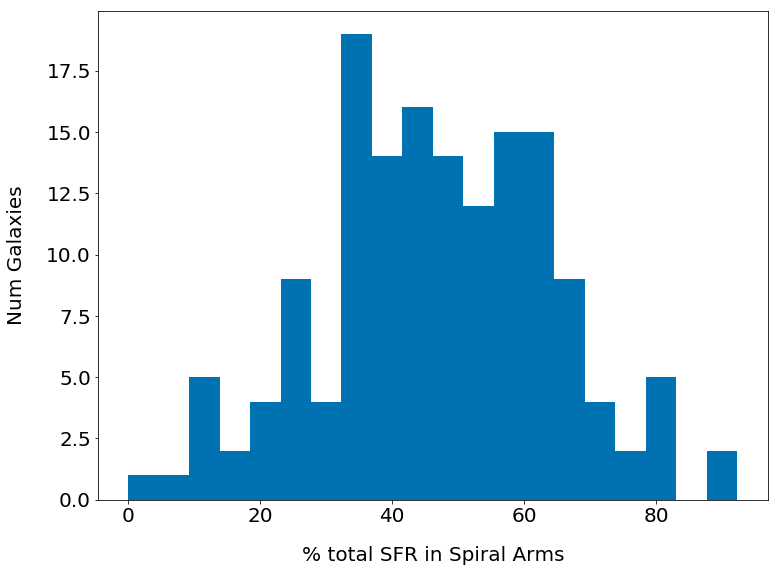

In [33]:
fig = plt.figure(figsize=(12, 9))

plt.hist(pc_tot_sfr, bins = 20)

plt.xlabel('% total SFR in Spiral Arms', labelpad=20, size=20)
plt.ylabel('Num Galaxies', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.savefig('sfr_in_spirals_hist')

In [17]:
for gal in gal_objs:
    gal.df['MaNGA ID'] = gal.mangaid

In [18]:
mangaid_list = []

for gal in gal_objs:
    mangaid_list.append(gal.mangaid)

In [19]:
df_list = []

for gal in gal_objs:
    df_list.append(gal.df)

In [20]:
spax_df = pd.concat(df_list)

In [21]:
spax_df = spax_df.dropna()

In [22]:
spax_df = spax_df[(spax_df.Comp == 0) & (spax_df.AGN == 0) & (spax_df.Seyfert == 0) & (spax_df.Liner == 0)]

In [23]:
spax_df = spax_df[(spax_df['$r/r_e$'] <= 1) & (spax_df['$r/r_e$'] >= 0.1)]

In [24]:
spax_df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Spiral Arm,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,Mass,$\lg{Mass}$,MaNGA ID
1764,11.997665,0.786094,0.030061,0.171968,0.029375,0.0,0.0,0.0,0.0,0.0,0.004043,0.001710,0.979344,2.226830e+11,11.347687,1-109308
1765,11.793067,0.697728,0.028429,0.149700,0.027367,0.0,0.0,0.0,0.0,0.0,0.003757,0.001700,0.962643,2.226830e+11,11.347687,1-109308
1766,11.802633,0.541168,0.029345,0.095138,0.023748,0.0,0.0,0.0,0.0,0.0,0.004662,0.002875,0.963424,2.226830e+11,11.347687,1-109308
1767,12.025852,0.347669,0.030270,0.042085,0.017495,0.0,0.0,0.0,0.0,0.0,0.007226,0.007398,0.981645,2.226830e+11,11.347687,1-109308
1834,11.957914,0.792545,0.029416,0.133767,0.027642,0.0,0.0,0.0,0.0,0.0,0.007517,0.003784,0.976099,2.226830e+11,11.347687,1-109308
1835,11.349176,0.861909,0.028596,0.172492,0.026646,1.0,0.0,0.0,0.0,0.0,0.005469,0.002085,0.926409,2.226830e+11,11.347687,1-109308
1836,10.941167,0.899165,0.032200,0.179711,0.028678,1.0,0.0,0.0,0.0,0.0,0.005723,0.002263,0.893104,2.226830e+11,11.347687,1-109308
1837,10.756754,0.832745,0.029660,0.152309,0.025783,0.0,0.0,0.0,0.0,0.0,0.006535,0.002725,0.878051,2.226830e+11,11.347687,1-109308
1838,10.807388,0.662477,0.026681,0.087502,0.019808,0.0,0.0,0.0,0.0,0.0,0.011207,0.006177,0.882184,2.226830e+11,11.347687,1-109308
1839,11.089850,0.491955,0.027675,0.046775,0.018310,0.0,0.0,0.0,0.0,0.0,0.018078,0.017047,0.905241,2.226830e+11,11.347687,1-109308


In [25]:
spax_df = spax_df[spax_df['SFR'] >= spax_df['$\sigma$SFR']]

In [26]:
spax_df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Spiral Arm,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,Mass,$\lg{Mass}$,MaNGA ID
1764,11.997665,0.786094,0.030061,0.171968,0.029375,0.0,0.0,0.0,0.0,0.0,0.004043,0.001710,0.979344,2.226830e+11,11.347687,1-109308
1765,11.793067,0.697728,0.028429,0.149700,0.027367,0.0,0.0,0.0,0.0,0.0,0.003757,0.001700,0.962643,2.226830e+11,11.347687,1-109308
1766,11.802633,0.541168,0.029345,0.095138,0.023748,0.0,0.0,0.0,0.0,0.0,0.004662,0.002875,0.963424,2.226830e+11,11.347687,1-109308
1834,11.957914,0.792545,0.029416,0.133767,0.027642,0.0,0.0,0.0,0.0,0.0,0.007517,0.003784,0.976099,2.226830e+11,11.347687,1-109308
1835,11.349176,0.861909,0.028596,0.172492,0.026646,1.0,0.0,0.0,0.0,0.0,0.005469,0.002085,0.926409,2.226830e+11,11.347687,1-109308
1836,10.941167,0.899165,0.032200,0.179711,0.028678,1.0,0.0,0.0,0.0,0.0,0.005723,0.002263,0.893104,2.226830e+11,11.347687,1-109308
1837,10.756754,0.832745,0.029660,0.152309,0.025783,0.0,0.0,0.0,0.0,0.0,0.006535,0.002725,0.878051,2.226830e+11,11.347687,1-109308
1838,10.807388,0.662477,0.026681,0.087502,0.019808,0.0,0.0,0.0,0.0,0.0,0.011207,0.006177,0.882184,2.226830e+11,11.347687,1-109308
1839,11.089850,0.491955,0.027675,0.046775,0.018310,0.0,0.0,0.0,0.0,0.0,0.018078,0.017047,0.905241,2.226830e+11,11.347687,1-109308
1905,11.733803,0.779113,0.033132,0.120216,0.028803,0.0,0.0,0.0,0.0,0.0,0.009133,0.005326,0.957805,2.226830e+11,11.347687,1-109308


### We're gonna make some lg(Mass) bins

In [27]:
max_lgmass = spax_df['$\lg{Mass}$'].max()
min_lgmass = spax_df['$\lg{Mass}$'].min()

In [28]:
num_bins = 10

diff = (max_lgmass - min_lgmass) / num_bins

bins = []

for i in range(num_bins + 1):
    bins.append(min_lgmass + i * diff)

In [29]:
labels = []

for i in range(num_bins):
    avg_val = (bins[i] + bins[i + 1]) / 2
    labels.append('%.2f' % avg_val)

In [30]:
spax_df['Mass Bin'] = pd.cut(x=spax_df['$\lg{Mass}$'], bins=bins, labels=labels)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [31]:
spax_df

,Radius,$H_{\alpha}$,$\sigma H_{\alpha}$,$H_{\beta}$,$\sigma H_{\beta}$,Spiral Arm,Comp,AGN,Seyfert,Liner,SFR,$\sigma$SFR,$r/r_e$,Mass,$\lg{Mass}$,MaNGA ID,Mass Bin
1764,11.997665,0.786094,0.030061,0.171968,0.029375,0.0,0.0,0.0,0.0,0.0,0.004043,0.001710,0.979344,2.226830e+11,11.347687,1-109308,11.23
1765,11.793067,0.697728,0.028429,0.149700,0.027367,0.0,0.0,0.0,0.0,0.0,0.003757,0.001700,0.962643,2.226830e+11,11.347687,1-109308,11.23
1766,11.802633,0.541168,0.029345,0.095138,0.023748,0.0,0.0,0.0,0.0,0.0,0.004662,0.002875,0.963424,2.226830e+11,11.347687,1-109308,11.23
1834,11.957914,0.792545,0.029416,0.133767,0.027642,0.0,0.0,0.0,0.0,0.0,0.007517,0.003784,0.976099,2.226830e+11,11.347687,1-109308,11.23
1835,11.349176,0.861909,0.028596,0.172492,0.026646,1.0,0.0,0.0,0.0,0.0,0.005469,0.002085,0.926409,2.226830e+11,11.347687,1-109308,11.23
1836,10.941167,0.899165,0.032200,0.179711,0.028678,1.0,0.0,0.0,0.0,0.0,0.005723,0.002263,0.893104,2.226830e+11,11.347687,1-109308,11.23
1837,10.756754,0.832745,0.029660,0.152309,0.025783,0.0,0.0,0.0,0.0,0.0,0.006535,0.002725,0.878051,2.226830e+11,11.347687,1-109308,11.23
1838,10.807388,0.662477,0.026681,0.087502,0.019808,0.0,0.0,0.0,0.0,0.0,0.011207,0.006177,0.882184,2.226830e+11,11.347687,1-109308,11.23
1839,11.089850,0.491955,0.027675,0.046775,0.018310,0.0,0.0,0.0,0.0,0.0,0.018078,0.017047,0.905241,2.226830e+11,11.347687,1-109308,11.23
1905,11.733803,0.779113,0.033132,0.120216,0.028803,0.0,0.0,0.0,0.0,0.0,0.009133,0.005326,0.957805,2.226830e+11,11.347687,1-109308,11.23


In [ ]:
df = spax_df[spax_df['Mass Bin'] == labels[6]]

df_spiral = df[df['Spiral Arm'] == 1]
df_nonspiral = df[df['Spiral Arm'] == 0]

unique_ids = df['MaNGA ID'].unique()

non_corr_avgs_spiral = []
sig_non_corr_avgs_spiral = []

non_corr_avgs_nonspiral = []
sig_non_corr_avgs_nonspiral = []

for mangaid in unique_ids:
    gal_df_spiral = df_spiral[df_spiral['MaNGA ID'] == mangaid]
    gal_df_nonspiral = df_nonspiral[df_nonspiral['MaNGA ID'] == mangaid]
    
    gal_index = mangaid_list.index(mangaid)
    
    avg_sfr_spiral = gal_df_spiral['SFR'].mean()
    var_avg_sfr_spiral = gal_objs[gal_index].sfr_var(gal_df_spiral.index, avg=True)
    
    avg_sfr_nonspiral = gal_df_nonspiral['SFR'].mean()
    var_avg_sfr_nonspiral = gal_objs[gal_index].sfr_var(gal_df_nonspiral.index, avg=True)
    
    non_corr_avgs_spiral.append(avg_sfr_spiral)
    sig_non_corr_avgs_spiral.append(var_avg_sfr_spiral)
    
    non_corr_avgs_nonspiral.append(avg_sfr_nonspiral)
    sig_non_corr_avgs_nonspiral.append(var_avg_sfr_nonspiral)
    
full_avg_spiral = sum(non_corr_avgs_spiral) / len(non_corr_avgs_spiral)
sig_full_avg_spiral = np.sqrt(sum(sig_non_corr_avgs_spiral) / len(sig_non_corr_avgs_spiral))

full_avg_nonspiral = sum(non_corr_avgs_nonspiral) / len(non_corr_avgs_nonspiral)
sig_full_avg_nonspiral = np.sqrt(sum(sig_non_corr_avgs_nonspiral) / len(sig_non_corr_avgs_nonspiral))

In [ ]:
non_corr_avgs_spiral

In [34]:
bin_sfr_vals_spiral = []
bin_sig_sfr_vals_spiral = []

bin_sfr_vals_nonspiral = []
bin_sig_sfr_vals_nonspiral = []

for label in labels:
    df = spax_df[spax_df['Mass Bin'] == label]
    
    df_spiral = df[df['Spiral Arm'] == 1]
    df_nonspiral = df[df['Spiral Arm'] == 0]
    
    unique_ids = df['MaNGA ID'].unique()
    
    non_corr_sums_spiral = []
    sig_non_corr_sums_spiral = []
    
    non_corr_sums_nonspiral = []
    sig_non_corr_sums_nonspiral = []
    
    for mangaid in unique_ids:
        gal_df_spiral = df_spiral[df_spiral['MaNGA ID'] == mangaid]
        gal_df_nonspiral = df_nonspiral[df_nonspiral['MaNGA ID'] == mangaid]
                 
        gal_index = mangaid_list.index(mangaid)
                 
        sum_sfr_spiral = gal_df_spiral['SFR'].sum()
        var_sum_sfr_spiral = gal_objs[gal_index].get_var(gal_df_spiral.index, mode='sfr', avg=False)
                 
        sum_sfr_nonspiral = gal_df_nonspiral['SFR'].sum()
        var_sum_sfr_nonspiral = gal_objs[gal_index].get_var(gal_df_nonspiral.index, mode='sfr', avg=False)
                 
        non_corr_sums_spiral.append(sum_sfr_spiral)
        sig_non_corr_sums_spiral.append(var_sum_sfr_spiral)
                 
        non_corr_sums_nonspiral.append(sum_sfr_nonspiral)
        sig_non_corr_sums_nonspiral.append(var_sum_sfr_nonspiral)
                 
    full_sum_spiral = sum(non_corr_sums_spiral)
    sig_full_sum_spiral = np.sqrt(sum(sig_non_corr_sums_spiral))

    full_sum_nonspiral = sum(non_corr_sums_nonspiral)
    sig_full_sum_nonspiral = np.sqrt(sum(sig_non_corr_sums_nonspiral))
    
    bin_sfr_vals_spiral.append(full_sum_spiral)
    bin_sig_sfr_vals_spiral.append(sig_full_sum_spiral)
                 
    bin_sfr_vals_nonspiral.append(full_sum_nonspiral)
    bin_sig_sfr_vals_nonspiral.append(sig_full_sum_nonspiral)

In [39]:
bin_sfr_vals_tot = []
bin_sig_sfr_vals_tot = []

for i in range(len(labels)):
    tot_sfr_bin = bin_sfr_vals_spiral[i] + bin_sfr_vals_nonspiral[i]
    sig_tot_sfr_bin = np.sqrt(bin_sig_sfr_vals_spiral[i]**2 + bin_sig_sfr_vals_nonspiral[i]**2)
    
    bin_sfr_vals_tot.append(tot_sfr_bin)
    bin_sig_sfr_vals_tot.append(sig_tot_sfr_bin)

In [41]:
bin_pc_tot_sfr_spiral = []
bin_sig_pc_tot_sfr_spiral = []

for i in range(len(labels)):
    bin_pc_sfr_spiral = 100 * bin_sfr_vals_spiral[i] / bin_sfr_vals_tot[i]
    
    bin_sig_pc_sfr_spiral = bin_pc_sfr_spiral * np.sqrt((bin_sig_sfr_vals_spiral[i]/bin_sfr_vals_spiral[i])**2 +
                                                        (bin_sig_sfr_vals_tot[i]/bin_sfr_vals_tot[i])**2)
    
    bin_pc_tot_sfr_spiral.append(bin_pc_sfr_spiral)
    bin_sig_pc_tot_sfr_spiral.append(bin_sig_pc_sfr_spiral)

(array([-40., -20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 10 Text yticklabel objects>)

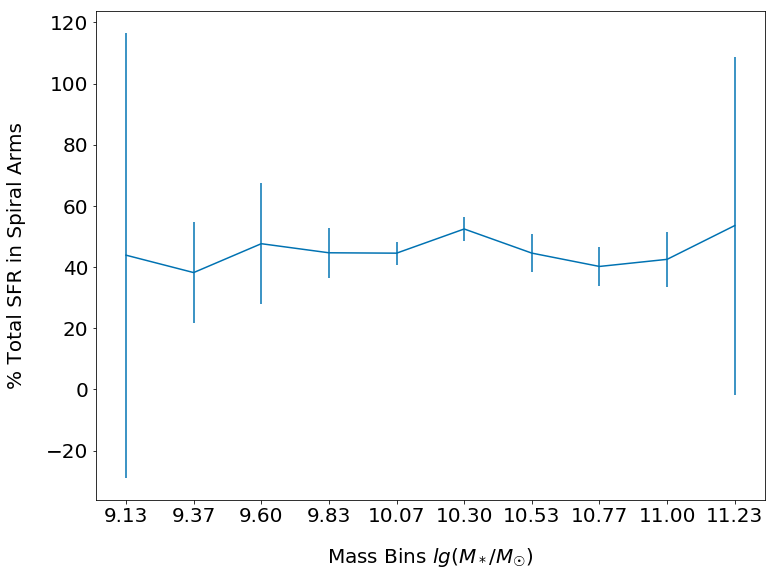

In [44]:
plt.figure(figsize=(12, 9))

plt.errorbar(labels, bin_pc_tot_sfr_spiral, yerr=bin_sig_pc_tot_sfr_spiral)

plt.xlabel('Mass Bins $lg(M_*/M_☉)$', labelpad=20, size=20)
plt.ylabel('% Total SFR in Spiral Arms', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

### We're going to make a S/N scatterplot

In [52]:
for gal in gal_objs:
    map_ha = gal.maps.getMap('emline_gflux', channel='ha_6564')
    map_hb = gal.maps.getMap('emline_gflux', channel='hb_4862')
    
    ha_snr = map_ha.snr.flatten()
    hb_snr = map_hb.snr.flatten()
    
    gal.df['S/N $H_{\\alpha}$'] = ha_snr
    gal.df['S/N $H_{\\beta}$'] = hb_snr
    
    gal.df['% SFR Error'] = (gal.df['$\sigma$SFR'] * 100) / gal.df['SFR']

In [56]:
df_list = []

for gal in gal_objs:
    df_list.append(gal.df)
    
spax_df = pd.concat(df_list)

In [57]:
spax_df = spax_df.dropna()

In [58]:
spax_df = spax_df[(spax_df.Comp == 0) & (spax_df.AGN == 0) & (spax_df.Seyfert == 0) & (spax_df.Liner == 0)]

In [59]:
spax_df = spax_df[(spax_df['$r/r_e$'] <= 1) & (spax_df['$r/r_e$'] >= 0.1)]

In [62]:
global_ha_snr = spax_df['S/N $H_{\\alpha}$'].tolist()
global_hb_snr = spax_df['S/N $H_{\\beta}$'].tolist()
global_sfr = spax_df['SFR'].tolist()
global_pcerr_sfr = spax_df['% SFR Error'].tolist()

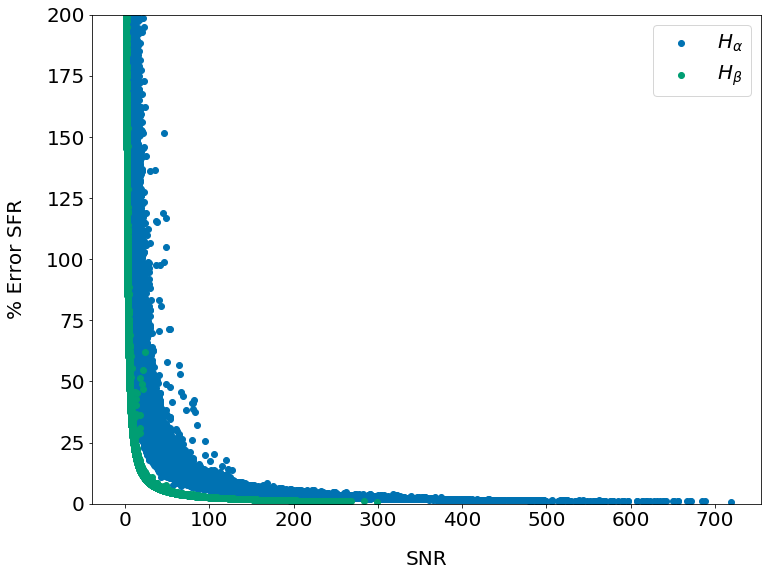

In [77]:
plt.figure(figsize=(12, 9))

plt.scatter(global_ha_snr, global_pcerr_sfr, label='$H_{\\alpha}$')
plt.scatter(global_hb_snr, global_pcerr_sfr, label='$H_{\\beta}$')

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('% Error SFR', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.ylim(0, 200)
plt.legend(fontsize=20)

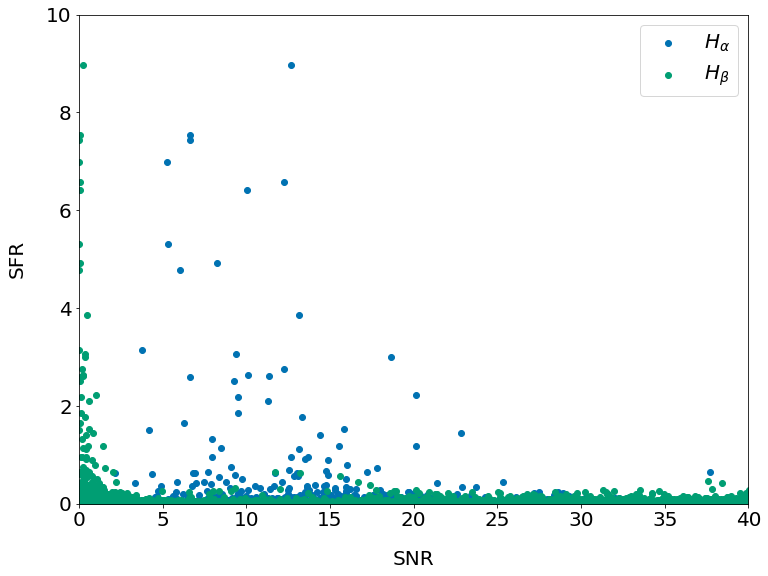

In [85]:
plt.figure(figsize=(12, 9))

plt.scatter(global_ha_snr, global_sfr, label='$H_{\\alpha}$')
plt.scatter(global_hb_snr, global_sfr, label='$H_{\\beta}$')

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('SFR', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)

plt.ylim(0, 10)
plt.xlim(0, 40)

plt.legend(fontsize=20)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.]),
 <a list of 9 Text yticklabel objects>)

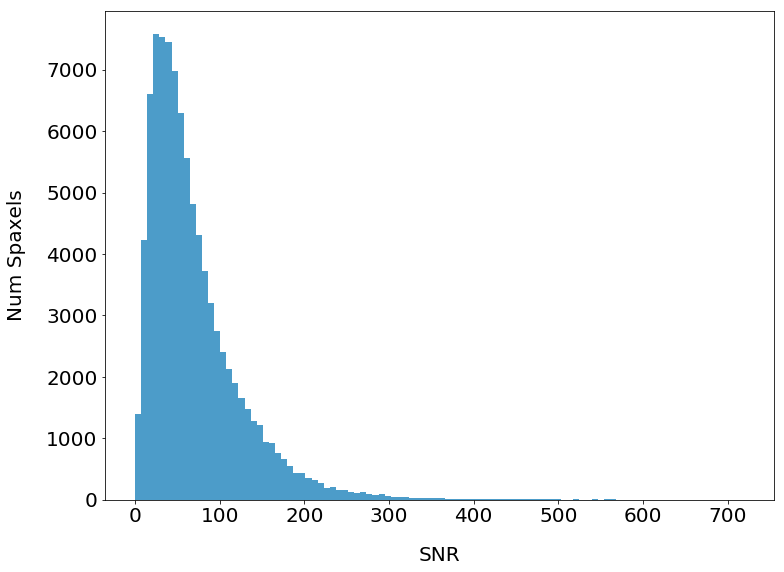

In [82]:
plt.figure(figsize=(12, 9))

plt.hist(global_ha_snr, bins=100, alpha=0.7)

plt.xlabel('SNR', labelpad=20, size=20)
plt.ylabel('Num Spaxels', labelpad=20, size=20)
plt.xticks(size=20)
plt.yticks(size=20)